In [6]:
# Import required libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [7]:
df = pd.read_csv('../data/Copy of CINV Final Raw Data_ADI2024.xlsx - Variable View.csv')

In [8]:
df

,Patient_Code,Gender,Age,Weight,Height,BMI,BSA,Marital_Status,Religion,County_of_Residence,...,Day_3_Vomiting,Number_of_Day_3_Vomiting_Episodes,Day_4_Nausea,Scale_of_Day_4_Nausea,Day_4_Vomiting,Number_of_Day_4_Vomiting_Episodes,Day_5_Nausea,Scale_of_Day_5_Nausea,Day_5_Vomiting,Number_of_Day_5_Vomiting_Episodes
0,200,Female,45,52,1.62,19.81,1.530,Married,Christian,Nairobi,...,No,0,Yes,3,No,0,Yes,1,No,0
1,300,Female,32,56,1.62,21.15,1.680,Single,Christian,Nairobi,...,No,0,No,0,No,0,Yes,7,Yes,1
2,500,Female,46,88,1.61,33.95,1.917,Divorced,Christian,Kiambu,...,No,0,No,0,No,0,No,0,No,0
3,600,Female,41,54,1.55,22.48,1.606,Married,Christian,Nairobi,...,No,0,No,0,No,0,No,0,No,0
4,800,Female,37,45,1.50,20.00,1.369,Married,Christian,Kiambu,...,No,0,No,0,No,0,No,0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,10900,Female,37,48,1.54,20.24,1.410,Single,Christian,Muranga,...,No,0,No,0,No,0,No,0,No,0
106,11000,Female,68,62,1.68,21.97,1.650,Married,Christian,Muranga,...,No,0,No,0,No,0,No,0,No,0
107,11100,Female,58,56,1.52,24.24,1.670,Married,Christian,Kiambu,...,No,0,No,0,No,0,No,0,No,0
108,11200,Female,33,56,1.62,21.34,1.680,Single,Christian,Nairobi,...,No,0,Yes,6,No,0,Yes,5,Yes,1


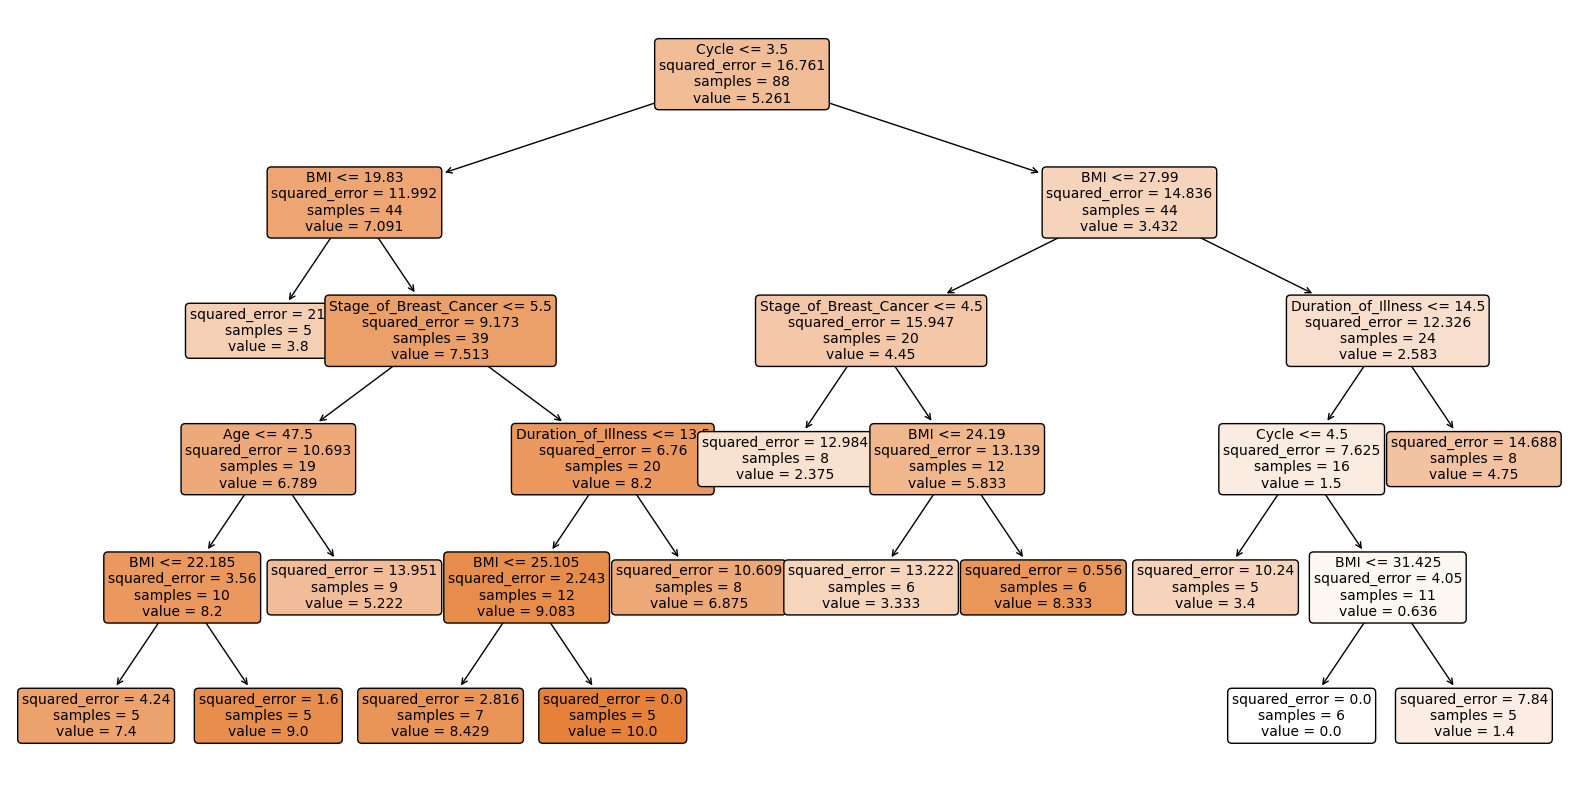

Training R² Score: 0.483
Testing R² Score: -0.532

Feature Importance:
                  feature  importance
4                   Cycle    0.450323
1                     BMI    0.270988
3     Duration_of_Illness    0.111934
2  Stage_of_Breast_Cancer    0.107796
0                     Age    0.058959
5   Anticipatory_Vomiting    0.000000


In [22]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Assuming your data is in a dataframe called 'df'
# Select relevant features (excluding the target and removing highly correlated features)
feature_columns = ['Age', 'BMI', 'Stage_of_Breast_Cancer', 
                  'Duration_of_Illness', 'Cycle' , 'Ondansetron',
                  'Anticipatory_Vomiting']

# Prepare features (X) and target (y)
X = df[feature_columns].copy()
y = df['Scale_of_Nausea_0_to_24_hours_post_Chemotherapy']

# Handle categorical variables
le = LabelEncoder()
for column in X.select_dtypes(include=['object']):
    X[column] = le.fit_transform(X[column])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
dt = DecisionTreeRegressor(max_depth=5, min_samples_leaf=5, random_state=42)
dt.fit(X_train, y_train)

# Visualize the tree
plt.figure(figsize=(20,10))
plot_tree(dt, 
          feature_names=feature_columns,
          filled=True, 
          rounded=True,
          fontsize=10)
plt.show()

# Print model performance
train_score = dt.score(X_train, y_train)
test_score = dt.score(X_test, y_test)
print(f"Training R² Score: {train_score:.3f}")
print(f"Testing R² Score: {test_score:.3f}")

# Feature importance
importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': dt.feature_importances_
}).sort_values('importance', ascending=False)
print("\nFeature Importance:")
print(importance)

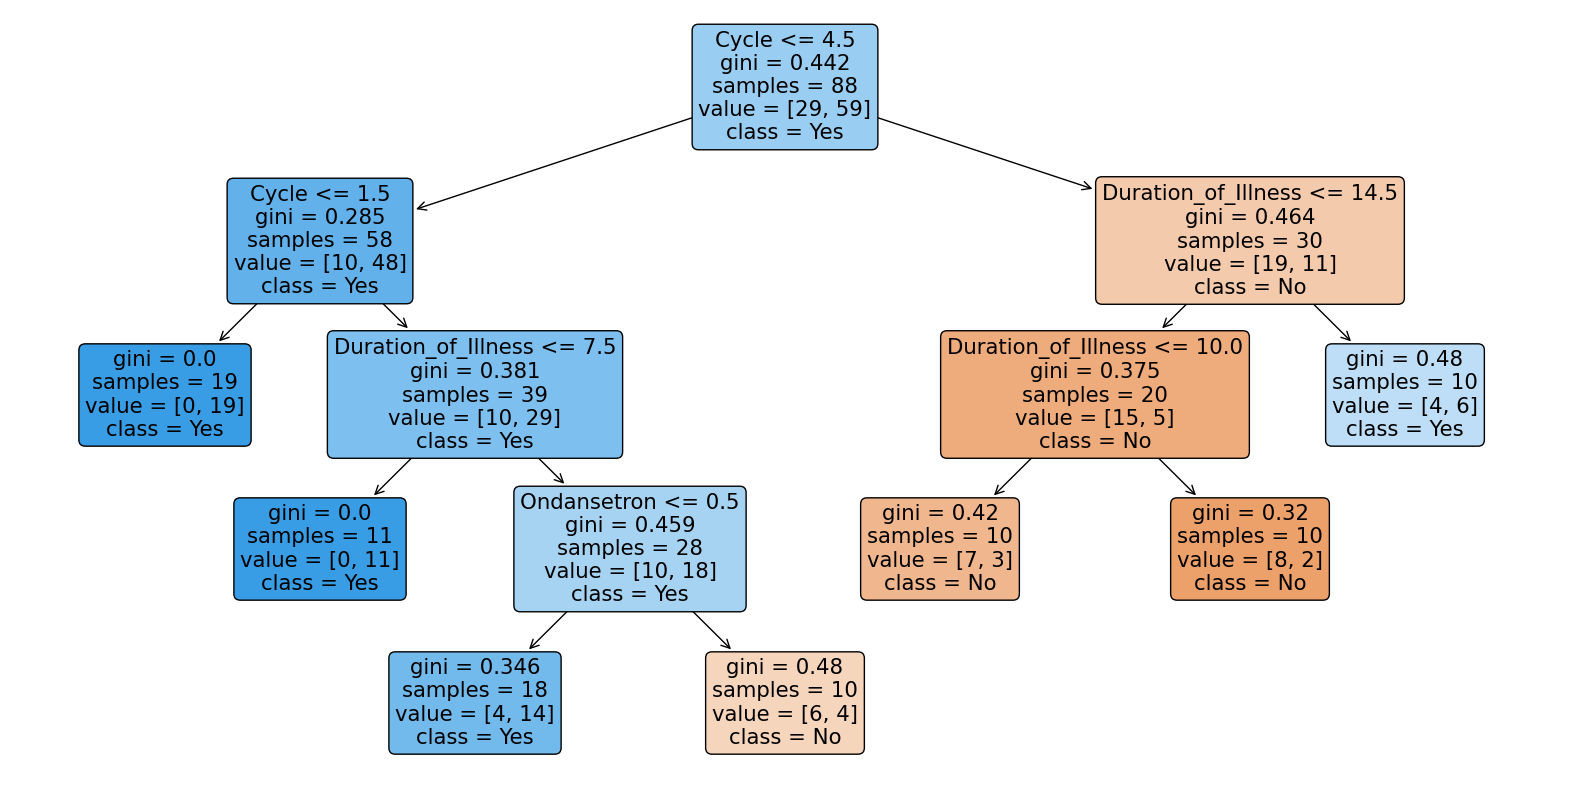

Training R² Score: 0.807
Testing R² Score: 0.682

Feature Importance:
                 feature  importance
1                  Cycle    0.643587
0    Duration_of_Illness    0.239272
2            Ondansetron    0.117141
3            Granisetron    0.000000
4  Anticipatory_Vomiting    0.000000


In [23]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Select relevant features
feature_columns = [ 
                  'Duration_of_Illness', 'Cycle',
                   'Ondansetron', 'Granisetron',
                  'Anticipatory_Vomiting']

# Prepare features (X) and target (y)
X = df[feature_columns].copy()
y = df['Nausea_within_24_hours_post_Chemotherapy']

# Handle categorical variables
le = LabelEncoder()
for column in X.select_dtypes(include=['object']):
    X[column] = le.fit_transform(X[column])

# Convert target to binary
y = le.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=10, random_state=42)
dt.fit(X_train, y_train)

# Visualize the tree
plt.figure(figsize=(20,10))
plot_tree(dt, 
          feature_names=feature_columns,
          class_names=['No', 'Yes'],
          filled=True, 
          rounded=True)
plt.show()

# Print model performance
train_score = dt.score(X_train, y_train)
test_score = dt.score(X_test, y_test)
print(f"Training R² Score: {train_score:.3f}")
print(f"Testing R² Score: {test_score:.3f}")

# Feature importance
importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': dt.feature_importances_
}).sort_values('importance', ascending=False)
print("\nFeature Importance:")
print(importance)

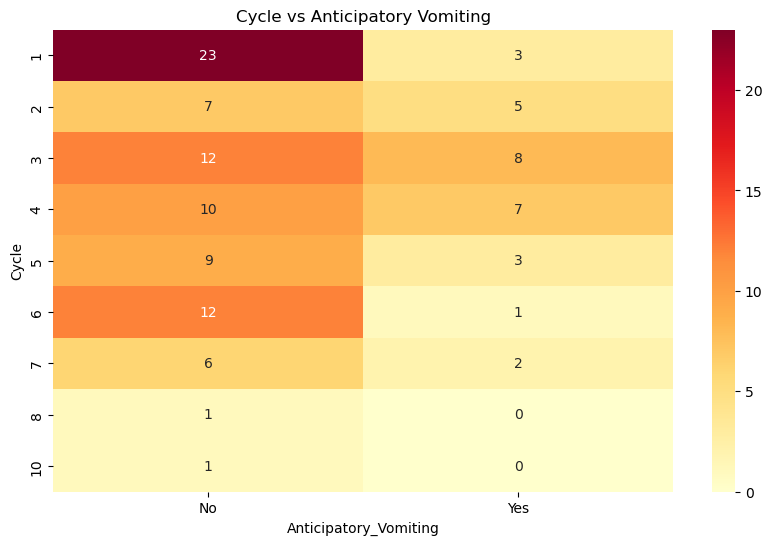

Chi-square statistic: 11.30
p-value: 0.1854

Percentage of Anticipatory Vomiting by Cycle:
Anticipatory_Vomiting          No        Yes
Cycle                                       
1                       88.461538  11.538462
2                       58.333333  41.666667
3                       60.000000  40.000000
4                       58.823529  41.176471
5                       75.000000  25.000000
6                       92.307692   7.692308
7                       75.000000  25.000000
8                      100.000000   0.000000
10                     100.000000   0.000000


In [16]:
# Check correlation between Cycle and Anticipatory_Vomiting
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Create contingency table
contingency = pd.crosstab(df['Cycle'], df['Anticipatory_Vomiting'])

# Chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency)

# Visualization
plt.figure(figsize=(10,6))
sns.heatmap(contingency, annot=True, fmt='d', cmap='YlOrRd')
plt.title('Cycle vs Anticipatory Vomiting')
plt.show()

print(f"Chi-square statistic: {chi2:.2f}")
print(f"p-value: {p_value:.4f}")

# Also show percentages of anticipatory vomiting by cycle
percentages = pd.crosstab(df['Cycle'], df['Anticipatory_Vomiting'], normalize='index') * 100
print("\nPercentage of Anticipatory Vomiting by Cycle:")
print(percentages)